
# LSTM for sequence classification in the IMDB dataset

In [3]:
from keras.models import Sequential
# from sklearn.externals import joblib
import numpy
import pandas as pd
from keras.datasets import imdb
from sklearn import model_selection
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import scipy
import pickle

# fix random seed for reproducibility
numpy.random.seed(7)


# Load Data

In [4]:
df = pd.read_csv("IMDB Dataset_Updated.csv", header=0)
df.head()
X = df['review']
y = df['sentiment']


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

* convert target variable into binary format

In [6]:
def function(x):
    if x=='positive':
        return 1
    else:
        return 0

y= y.apply(function)
print(y[:5])

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64


# Text to vectorizer

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix


In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


In [9]:
X_train.head(5)

21626    Portrays the day to day stark reality of survi...
4521     This was an interesting study in societal sexu...
3652     Prior to Airport 79' these movies were rather ...
22212    This is without doubt the most exciting and sa...
17669    Maybe I'm alone here, but this is a crap show....
Name: review, dtype: object

In [10]:
def create_document_term_matrix(message_list, vectorizer):
    # doc_term_matrix = vectorizer.fit_transform(message_list)
    helper = vectorizer.fit(message_list)
    # return pd.DataFrame(doc_term_matrix.toarray(), columns=vectorizer.get_feature_names_out()), helper
    return helper



top_words = 5000
count_vect = TfidfVectorizer(max_features=top_words)
helper = create_document_term_matrix(X_train, count_vect)


In [14]:
len(helper)

TypeError: object of type 'TfidfVectorizer' has no len()

In [19]:
X_train.head(5)

21626    Portrays the day to day stark reality of survi...
4521     This was an interesting study in societal sexu...
3652     Prior to Airport 79' these movies were rather ...
22212    This is without doubt the most exciting and sa...
17669    Maybe I'm alone here, but this is a crap show....
Name: review, dtype: object

In [20]:
X_train.shape[0]


25000

In [21]:
print(helper.transform([X_train.iloc[0]]).nonzero()[1])
print(helper.transform([X_train.iloc[1]]).nonzero()[1])
print(helper.transform([X_train.iloc[2]]).nonzero()[1])


[4990 4862 4514 4463 4452 4449 4437 4334 4167 3963 3828 3567 3566 3563
 3553 3421 3363 3171 3132 3128 3111 3100 3067 2947 2758 2627 2463 2285
 1707 1558 1337 1158  648  550  478  289  244  108  102]
[4991 4990 4976 4975 4957 4917 4890 4876 4875 4870 4866 4854 4815 4787
 4754 4737 4606 4519 4514 4468 4463 4437 4435 4275 4257 4243 4125 3963
 3938 3923 3922 3855 3815 3700 3577 3320 3252 3215 3174 3172 3144 3127
 3111 3099 3067 3025 2975 2947 2914 2770 2746 2716 2620 2582 2569 2512
 2491 2391 2385 2351 2285 2251 2236 2149 2142 2119 2090 2085 2076 2034
 1990 1962 1909 1880 1870 1812 1645 1568 1492 1344 1268 1186 1144 1059
 1045  911  806  767  719  671  642  563  506  364  333  315  302  230
  228  191  102   70]
[4965 4917 4901 4881 4879 4875 4866 4858 4815 4814 4737 4706 4690 4573
 4529 4515 4514 4463 4459 4452 4451 4449 4437 4370 4283 4204 4165 4111
 3955 3873 3826 3576 3572 3547 3423 3407 3347 3172 3166 3160 3144 3136
 3132 3111 2975 2955 2948 2947 2804 2758 2737 2674 2627 2608 2516 248

In [22]:
print(helper.transform([X_train.iloc[0]]).nonzero()[1])


[4990 4862 4514 4463 4452 4449 4437 4334 4167 3963 3828 3567 3566 3563
 3553 3421 3363 3171 3132 3128 3111 3100 3067 2947 2758 2627 2463 2285
 1707 1558 1337 1158  648  550  478  289  244  108  102]


In [23]:
def function(x, temp):
    temp.append(helper.transform(x).nonzero()[1])


X_train_Vect = []
X_test_Vect = []
for i in range(X_train.shape[0]):
    function([X_train.iloc[i]], X_train_Vect)
for i in range(X_test.shape[0]):
    function([X_test.iloc[i]], X_test_Vect)


In [24]:
print(len(X_train_Vect))
print(type(X_train_Vect))
# X_train_Vect
X_train_Vect[0:2]


25000
<class 'list'>


[array([4990, 4862, 4514, 4463, 4452, 4449, 4437, 4334, 4167, 3963, 3828,
        3567, 3566, 3563, 3553, 3421, 3363, 3171, 3132, 3128, 3111, 3100,
        3067, 2947, 2758, 2627, 2463, 2285, 1707, 1558, 1337, 1158,  648,
         550,  478,  289,  244,  108,  102], dtype=int32),
 array([4991, 4990, 4976, 4975, 4957, 4917, 4890, 4876, 4875, 4870, 4866,
        4854, 4815, 4787, 4754, 4737, 4606, 4519, 4514, 4468, 4463, 4437,
        4435, 4275, 4257, 4243, 4125, 3963, 3938, 3923, 3922, 3855, 3815,
        3700, 3577, 3320, 3252, 3215, 3174, 3172, 3144, 3127, 3111, 3099,
        3067, 3025, 2975, 2947, 2914, 2770, 2746, 2716, 2620, 2582, 2569,
        2512, 2491, 2391, 2385, 2351, 2285, 2251, 2236, 2149, 2142, 2119,
        2090, 2085, 2076, 2034, 1990, 1962, 1909, 1880, 1870, 1812, 1645,
        1568, 1492, 1344, 1268, 1186, 1144, 1059, 1045,  911,  806,  767,
         719,  671,  642,  563,  506,  364,  333,  315,  302,  230,  228,
         191,  102,   70], dtype=int32)]

x = [[1, 2], [1, 2, 3], [1]]
y = numpy.array([numpy.array(xi) for xi in x], dtype=object)
print(y)

In [25]:
# X_train_Vect = numpy.array(X_train_Vect, ndmin = 2)
# X_test_Vect = numpy.array(X_test_Vect, ndmin = 2)
X_train_Vect = numpy.array([numpy.array(xi) for xi in X_train_Vect])
X_test_Vect = numpy.array([numpy.array(xi) for xi in X_test_Vect])

C:\Users\kashi\AppData\Local\Temp/ipykernel_35816/3141663967.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_Vect = numpy.array([numpy.array(xi) for xi in X_train_Vect])
C:\Users\kashi\AppData\Local\Temp/ipykernel_35816/3141663967.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_Vect = numpy.array([numpy.array(xi) for xi in X_test_Vect])


In [26]:
X_train_Vect[:5]


array([array([4990, 4862, 4514, 4463, 4452, 4449, 4437, 4334, 4167, 3963, 3828,
              3567, 3566, 3563, 3553, 3421, 3363, 3171, 3132, 3128, 3111, 3100,
              3067, 2947, 2758, 2627, 2463, 2285, 1707, 1558, 1337, 1158,  648,
               550,  478,  289,  244,  108,  102], dtype=int32)                ,
       array([4991, 4990, 4976, 4975, 4957, 4917, 4890, 4876, 4875, 4870, 4866,
              4854, 4815, 4787, 4754, 4737, 4606, 4519, 4514, 4468, 4463, 4437,
              4435, 4275, 4257, 4243, 4125, 3963, 3938, 3923, 3922, 3855, 3815,
              3700, 3577, 3320, 3252, 3215, 3174, 3172, 3144, 3127, 3111, 3099,
              3067, 3025, 2975, 2947, 2914, 2770, 2746, 2716, 2620, 2582, 2569,
              2512, 2491, 2391, 2385, 2351, 2285, 2251, 2236, 2149, 2142, 2119,
              2090, 2085, 2076, 2034, 1990, 1962, 1909, 1880, 1870, 1812, 1645,
              1568, 1492, 1344, 1268, 1186, 1144, 1059, 1045,  911,  806,  767,
               719,  671,  642,  563,  

# Read Pickle File

In [27]:
# import pickle
# def load_model():
#     with open('data_IMDB_pickle.pkl', 'rb') as file:
#         data = pickle.load(file)
#     return data


# data = load_model()
# X_train = data['X_train']
# y_train = data['y_train']
# X_test = data['X_test']
# y_test = data['y_test']


In [28]:
# X_train = list(X_train)
print(X_train_Vect[0])
print(len(X_train_Vect[0]))
print(type(X_train_Vect))


[4990 4862 4514 4463 4452 4449 4437 4334 4167 3963 3828 3567 3566 3563
 3553 3421 3363 3171 3132 3128 3111 3100 3067 2947 2758 2627 2463 2285
 1707 1558 1337 1158  648  550  478  289  244  108  102]
39
<class 'numpy.ndarray'>


In [29]:
# y_train = list(y_train)
print(y_train[:10])
print(type(y_train))


21626    1
4521     1
3652     0
22212    1
17669    0
35681    0
38147    0
2741     1
27522    1
46900    1
Name: sentiment, dtype: int64
<class 'pandas.core.series.Series'>


In [30]:
print(len(X_train_Vect))
print(len(y_train)) 
print(len(X_test)) 
print(len(y_test)) 


25000
25000
25000
25000


In [31]:
X_train_Vect

array([array([4990, 4862, 4514, 4463, 4452, 4449, 4437, 4334, 4167, 3963, 3828,
              3567, 3566, 3563, 3553, 3421, 3363, 3171, 3132, 3128, 3111, 3100,
              3067, 2947, 2758, 2627, 2463, 2285, 1707, 1558, 1337, 1158,  648,
               550,  478,  289,  244,  108,  102], dtype=int32)                ,
       array([4991, 4990, 4976, 4975, 4957, 4917, 4890, 4876, 4875, 4870, 4866,
              4854, 4815, 4787, 4754, 4737, 4606, 4519, 4514, 4468, 4463, 4437,
              4435, 4275, 4257, 4243, 4125, 3963, 3938, 3923, 3922, 3855, 3815,
              3700, 3577, 3320, 3252, 3215, 3174, 3172, 3144, 3127, 3111, 3099,
              3067, 3025, 2975, 2947, 2914, 2770, 2746, 2716, 2620, 2582, 2569,
              2512, 2491, 2391, 2385, 2351, 2285, 2251, 2236, 2149, 2142, 2119,
              2090, 2085, 2076, 2034, 1990, 1962, 1909, 1880, 1870, 1812, 1645,
              1568, 1492, 1344, 1268, 1186, 1144, 1059, 1045,  911,  806,  767,
               719,  671,  642,  563,  

In [32]:
print(type(X_train_Vect))
print(type(y_train))
print(type(X_test))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [33]:
print(type(X_train_Vect))

y_train = numpy.array(y_train)
# y_train = list(y_train)
print(type(y_train))

print(type(X_test_Vect))

y_test = numpy.array(y_test)
# y_test = list(y_test)
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [34]:
# max(numpy.max(X_test_Vect))

# Truncate and/or pad input sequences

In [35]:
# truncate and/or pad input sequences
max_review_length = 600
X_train_Vect = sequence.pad_sequences(X_train_Vect, maxlen=max_review_length)
X_test_Vect = sequence.pad_sequences(X_test_Vect, maxlen=max_review_length)

print(X_train_Vect.shape)


(25000, 600)


# Create the model

In [36]:
Sequential()


In [37]:
# from keras import metrics
# model.compile(loss='mse', optimizer='adam', metrics=[
#               metrics.mean_squared_error, metrics.mean_absolute_error, metrics.mean_absolute_percentage_error, metrics.cosine_proximity])


In [38]:

top_words = 5000
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


# Final evaluation of the model

In [40]:
history = model.fit(X_train_Vect, y_train, epochs=1, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test_Vect, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


391/391 [==============================] - 461s 1s/step - loss: 0.3669 - accuracy: 0.8442
Accuracy: 86.82%


In [ ]:
model 

In [47]:
# import pickle
# data_IMDB = {"helper": helper, "model": model}
# with open('data_IMDB_pickle_TFIDF03.pkl', 'wb') as file:
#     pickle.dump(data_IMDB, file)


# pickle.dump(helper, 'helper.pkl')

# pickle.dump(model, 'model.pkl')
# pickle.dump(helper, open('helper.pkl', 'wb'))
# pickle.dump(model, open('model.pkl', 'wb'))


INFO:tensorflow:Assets written to: ram://19496c14-233e-4321-b91e-0bf0afa30ef1/assets


INFO:tensorflow:Assets written to: ram://19496c14-233e-4321-b91e-0bf0afa30ef1/assets


In [43]:
# def load_model():
#     with open('data_IMDB_pickle_TFIDF03.pkl', 'rb') as file:
#         data = pickle.load(file)
#     return data


# data_IMDB = load_model()
# helper = data_IMDB["helper"]
# model = data_IMDB["model"]


FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://28ff7aba-6496-413b-8f3f-d2d1e993f99b/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [ ]:
# sample = ["This was  movie. worst"]
# # sample = ["""
# #          If you keep rigid historical perspective out of it, this film is actually quite entertaining. It's got action, adventure and romance, and one of the premiere casting match-ups of the era with Errol Flynn and Olivia de Havilland in the lead roles. As evident on this board, the picture doesn't pass muster with purists who look for one hundred percent accuracy in their story telling. To get beyond that, one need only put aside the history book, and enjoy the story as if it were a work of fiction. I know, I know, that's hard to do when you consider Custer's Last Stand at the Little Big Horn and it's prominence in the history of post Civil War America. So I guess there's an unresolved quandary with the picture, no matter how you look at it.<br /><br />There's a lot to take in here though for the picture's two hour plus run time. Custer's arrival at West Point is probably the first head scratcher, riding up as he does in full military regalia. The practical joke by Sharp (Arthur Kennedy) putting him up in the Major's headquarters probably should have gotten them both in trouble.<br /><br />Ironically, a lot of scenes in this military film play for comedy, as in Custer's first meeting with Libby Bacon, and subsequent encounters that include tea reader Callie (Hattie McDaniel). I hadn't noticed it before in other films, but McDaniel reminded me an awful lot of another favorite character actor of mine from the Forties, Mantan Moreland. So much so that in one scene it looked like it might have been Moreland hamming it up in a dress. With that in mind, the owl scene was a hoot too.<br /><br />As for Flynn, it's interesting to note that a year earlier, he portrayed J.E.B. Stuart opposite Ronald Reagan's depiction of General Custer in "Santa Fe Trail", both vying for the attention of none other than Olivia de Havilland. In that film, Reagan put none of the arrogance and flamboyance into the character of Custer that history remembers, while in Flynn's portrayal here it's more than evident. But it doesn't come close to that of Richard Mulligan's take on the military hero in 1970's "Little Big Man". Let's just say that one was a bit over the top.<br /><br />The better take away the picture had for me was the manner in which Custer persevered to maintain his good name and not gamble it away on a risky business venture. That and his loyalty to the men he led in battle along with the discipline he developed over the course of the story. Most poignant was that final confrontation with arch rival Sharp just before riding into the Little Big Horn, in which he declared that hell or glory was entirely dependent on one's point of view. Earlier, a similar remark might have given us the best insight of all into Custer's character, when he stated - "You take glory with you when it's your time to go".
# # """]

# sample = helper.transform(sample).nonzero()[1]
# sample = sequence.pad_sequences([sample], maxlen=max_review_length)
# val = model.predict(sample)
# print(val[0][0])
# if(val>=0.5):
#     print("positive")
# else:
#     print("negative")


NameError: name 'helper' is not defined

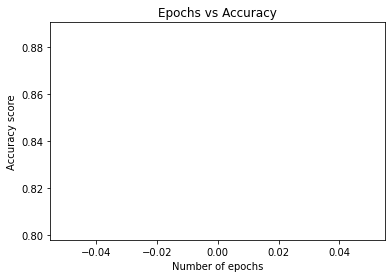

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title("Epochs vs Accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy score")
plt.show()


In [16]:
from tensorflow.keras.models import load_model

from scipy import sparse

# sparse.save_npz("yourmatrix.npz", your_matrix)
# your_matrix_back = sparse.load_npz("yourmatrix.npz")
# model.save('model.h5')
# pickle.dump(helper, open("helper.pkl", "wb"))


In [17]:
model = load_model('model.h5')
helper02 = pickle.load(open('helper.pkl', 'rb'))


C:\Users\kashi\AppData\Local\Temp/ipykernel_48452/1065603964.py:2: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  helper02 = pickle.load(open('helper.pkl', 'rb'))


In [33]:
sample = [" good  "]
# sample = ["If you keep rigid historical perspective out of it, this film is actually quite entertaining. It's got action, adventure and romance, and one of the premiere casting match-ups of the era with Errol Flynn and Olivia de Havilland in the lead roles. As evident on this board, the picture doesn't pass muster with purists who look for one hundred percent accuracy in their story telling. To get beyond that, one need only put aside the history book, and enjoy the story as if it were a work of fiction. I know, I know, that's hard to do when you consider Custer's Last Stand at the Little Big Horn and it's prominence in the history of post Civil War America. So I guess there's an unresolved quandary with the picture, no matter how you look at it.<br /><br />There's a lot to take in here though for the picture's two hour plus run time. Custer's arrival at West Point is probably the first head scratcher, riding up as he does in full military regalia. The practical joke by Sharp (Arthur Kennedy) putting him up in the Major's headquarters probably should have gotten them both in trouble.<br /><br />Ironically, a lot of scenes in this military film play for comedy, as in Custer's first meeting with Libby Bacon, and subsequent encounters that include tea reader Callie (Hattie McDaniel). I hadn't noticed it before in other films, but McDaniel reminded me an awful lot of another favorite character actor of mine from the Forties, Mantan Moreland. So much so that in one scene it looked like it might have been Moreland hamming it up in a dress. With that in mind, the owl scene was a hoot too.<br /><br />As for Flynn, it's interesting to note that a year earlier, he portrayed J.E.B. Stuart opposite Ronald Reagan's depiction of General Custer in "Santa Fe Trail", both vying for the attention of none other than Olivia de Havilland. In that film, Reagan put none of the arrogance and flamboyance into the character of Custer that history remembers, while in Flynn's portrayal here it's more than evident. But it doesn't come close to that of Richard Mulligan's take on the military hero in 1970's "Little Big Man". Let's just say that one was a bit over the top.<br /><br />The better take away the picture had for me was the manner in which Custer persevered to maintain his good name and not gamble it away on a risky business venture. That and his loyalty to the men he led in battle along with the discipline he developed over the course of the story. Most poignant was that final confrontation with arch rival Sharp just before riding into the Little Big Horn, in which he declared that hell or glory was entirely dependent on one's point of view. Earlier, a similar remark might have given us the best insight of all into Custer's character, when he stated - "You take glory with you when it's your time to go."]
max_review_length = 600
print(type(sample))
print(len(sample))
sample = helper02.transform(sample).nonzero()[1]
print(type(sample))
print(len(sample))
sample = list(sample)
print(type(sample))
print(len(sample))
sample = sequence.pad_sequences([sample], maxlen=max_review_length)

print(type(sample))
print(len(sample))
val = model.predict(sample)
print(val[0][0])
if(val >= 0.5):
    print("positive")
else:
    print("negative")


<class 'list'>
1
<class 'numpy.ndarray'>
1
<class 'list'>
1
<class 'numpy.ndarray'>
1
0.6988591
positive
